In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import networkx as nx
import re
import sys
import os
import numpy as np
from scipy.stats import linregress
import matplotlib.cm as cm
colors = cm.magma(np.linspace(0, 0.8, 10))

array([0.06533 , 0.047318, 0.184892, 1.      ])

In [2]:
df_trips=pd.read_parquet(r"..\..\dados\trips_historico.parquet")
df_stops=pd.read_parquet(r"..\..\dados\stops_historico_categorizado.parquet")
df_passageiros=pd.read_parquet(r"..\..\dados\passageiros_unificado.parquet")


In [3]:
df_stops=df_stops.rename(columns={"data_referencia":"data"})
df_stops['data']=pd.to_datetime(df_stops['data'],format='%Y%m')

In [20]:
pasta=r"..\..\dados\analises_grafo\metricas_paradas"
arquivos = [f for f in os.listdir(pasta) if f.endswith(".parquet")]

dfs = []
for f in arquivos:
    caminho = os.path.join(pasta, f)
    df_tmp = pd.read_parquet(caminho)
    df_tmp["data"] = os.path.splitext(f)[0].split("_")[1]  # nome sem extensão
    dfs.append(df_tmp)

# Concatena tudo
df = pd.concat(dfs, ignore_index=True)
df['data']=pd.to_datetime(df['data'],format="%Y%m")

In [31]:
df.groupby(['stop_name'])[
    ['betweenness_centrality','degree_centrality','closeness_centrality']
    ].mean().sort_values("degree_centrality",ascending=False).reset_index().iloc[:10]

,stop_name,betweenness_centrality,degree_centrality,closeness_centrality
0,"R. Cachoeira Do Arrependido, 59",0.000354,0.002427,0.003681
1,"Av. Pires Do Rio, 3413",0.001174,0.002219,0.002070
2,"R. Francisco Albani, 450",0.000208,0.001618,0.002790
3,"R. Firminópolis, 176",0.000031,0.001618,0.001494
4,"R. Francisco Albani, 939",0.000275,0.001618,0.002830
5,"R. Ivaí, 187",0.000004,0.001618,0.001079
6,"R. Preste, 2",0.000825,0.001618,0.001416
7,"R. Firminópolis, 37",0.000026,0.001618,0.001503
8,"Av. Da Solidariedade, 23",0.000711,0.001618,0.001387
9,"Av. Da Solidariedade, 111",0.000596,0.001618,0.001348


In [32]:
df.groupby(['stop_name'])[
    ['betweenness_centrality','degree_centrality','closeness_centrality']
    ].mean().sort_values("betweenness_centrality",ascending=False).reset_index().iloc[:10]

,stop_name,betweenness_centrality,degree_centrality,closeness_centrality
0,Vital Brasil C/B,0.145546,0.000223,0.012974
1,Parada Vital Brasil,0.145523,0.000223,0.012780
2,"R. Mmdc, 252",0.141006,0.000227,0.011918
3,Parada Waldemar Ortiz,0.140962,0.000227,0.011584
4,Parada Eusebio Matoso,0.140018,0.000228,0.012274
5,"R. Reação, 466",0.119568,0.000346,0.010646
6,"Av. Eng. Heitor Antônio Eiras Garcia, 3290",0.119030,0.000346,0.009117
7,R. Reação,0.110477,0.000381,0.009819
8,"Av. Sta. Marina, 2557",0.109945,0.000342,0.010540
9,Estádio Do Pacaembú,0.108658,0.000223,0.011636


In [33]:
df.groupby(['stop_name'])[
    ['betweenness_centrality','degree_centrality','closeness_centrality']
    ].mean().sort_values("closeness_centrality",ascending=False).reset_index().iloc[:10]

,stop_name,betweenness_centrality,degree_centrality,closeness_centrality
0,"R. Guaianases, 651",0.000591,0.000348,0.018884
1,"Pça. Princ. Isabel, 213",0.000000,0.000110,0.018819
2,R. Guaianases,0.000517,0.000333,0.018723
3,Pça. Princ. Isabel,0.000000,0.000108,0.018577
4,"R. Guaianases, 755",0.000427,0.000269,0.018336
5,"R. Guaianases, 667",0.000526,0.000377,0.017385
6,"R. Guaianases, 743",0.000475,0.000347,0.016929
7,"R. Paula Sousa, 374",0.106751,0.000219,0.016688
8,Terminal Princesa Isabel Ref.: Av Rio Branco/ ...,0.000000,0.000115,0.016376
9,"R. Da Cantareira, 215",0.106711,0.000219,0.016373


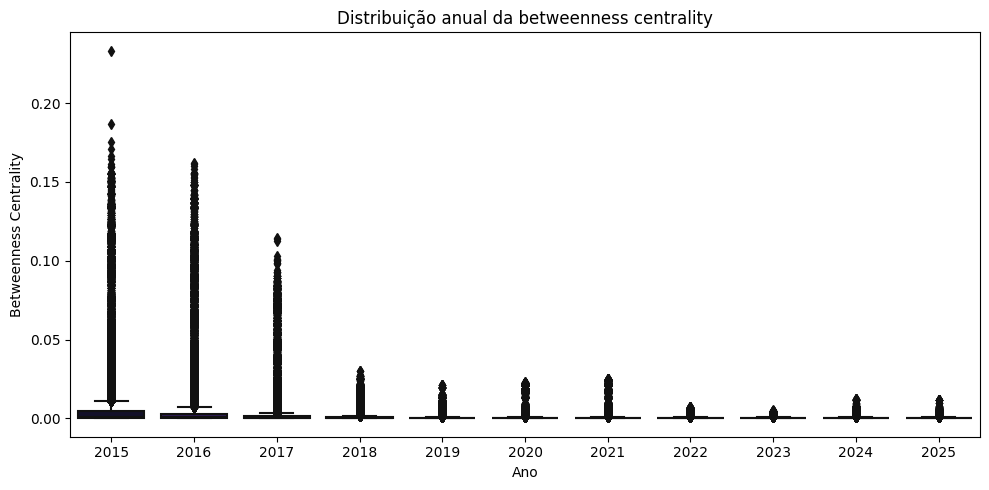

In [5]:
df['ano'] = pd.to_datetime(df['data']).dt.year

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='ano', y='betweenness_centrality', palette="magma")
plt.title('Distribuição anual da betweenness centrality')
plt.xlabel('Ano')
plt.ylabel('Betweenness Centrality')
plt.tight_layout()
plt.show()


C:\Users\franc\AppData\Local\Temp\ipykernel_7388\2787962970.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, intercept + slope*x, 'r', label='Regressão Linear', color=colors[-1])


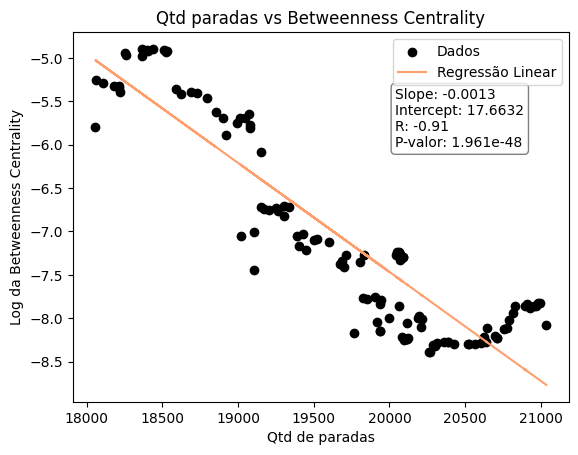

In [13]:
# correlação entre betweeness e qtd de paradas
df_stops_correlacao=df_stops.drop_duplicates(subset=['data','stop_id']).groupby("data")[['stop_id']].count()
df_metricas_centralidade_agrupado=df.groupby('data')[['betweenness_centrality','degree_centrality','closeness_centrality']].mean()

# juntar em um DataFrame
df_historico = pd.concat([df_metricas_centralidade_agrupado, df_stops_correlacao], axis=1)
# df_historico.columns = ['qtd_rotas', 'soma_v0001']

x = df_historico['stop_id']
y = np.log(df_historico['betweenness_centrality'])  # log se quiser

# Regressão linear
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Scatter plot com linha de regressão
plt.scatter(x, y, label='Dados',color="#000000")
plt.plot(x, intercept + slope*x, 'r', label='Regressão Linear', color=colors[-1])

# Texto com coeficiente e p-valor
plt.text(
    0.65, 0.85,  # posição relativa no gráfico (0-1 do eixo)
    f"Slope: {slope:.4f}\nIntercept: {intercept:.4f}\nR: {r_value:.2f}\nP-valor: {p_value:.4g}",
    transform=plt.gca().transAxes,
    fontsize=10,
    verticalalignment='top',
    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.5)
)

plt.xlabel("Qtd de paradas")
plt.ylabel("Log da Betweenness Centrality")
plt.title("Qtd paradas vs Betweenness Centrality")
plt.legend()
plt.show()

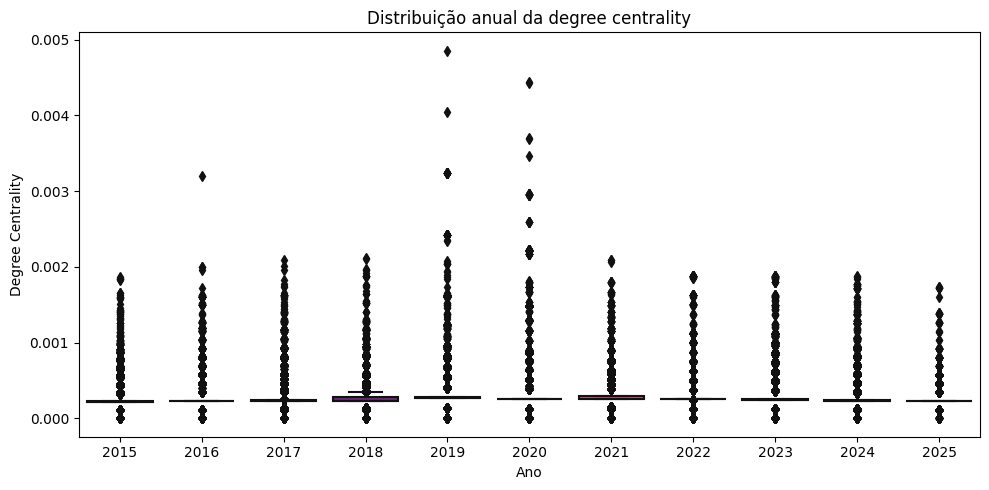

In [14]:
df['ano'] = pd.to_datetime(df['data']).dt.year

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='ano', y='degree_centrality',palette='magma')
plt.title('Distribuição anual da degree centrality')
plt.xlabel('Ano')
plt.ylabel('Degree Centrality')
plt.tight_layout()
plt.show()


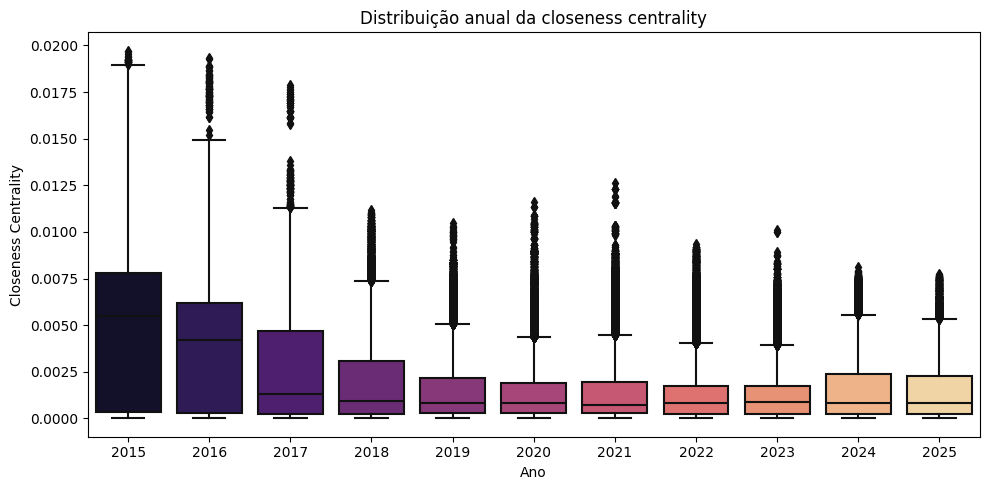

In [15]:
df['ano'] = pd.to_datetime(df['data']).dt.year

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='ano', y='closeness_centrality',palette='magma')
plt.title('Distribuição anual da closeness centrality')
plt.xlabel('Ano')
plt.ylabel('Closeness Centrality')
plt.tight_layout()
plt.show()


In [14]:
df=df.groupby("stop_id")[['betweenness_centrality','degree_centrality','closeness_centrality']].mean()

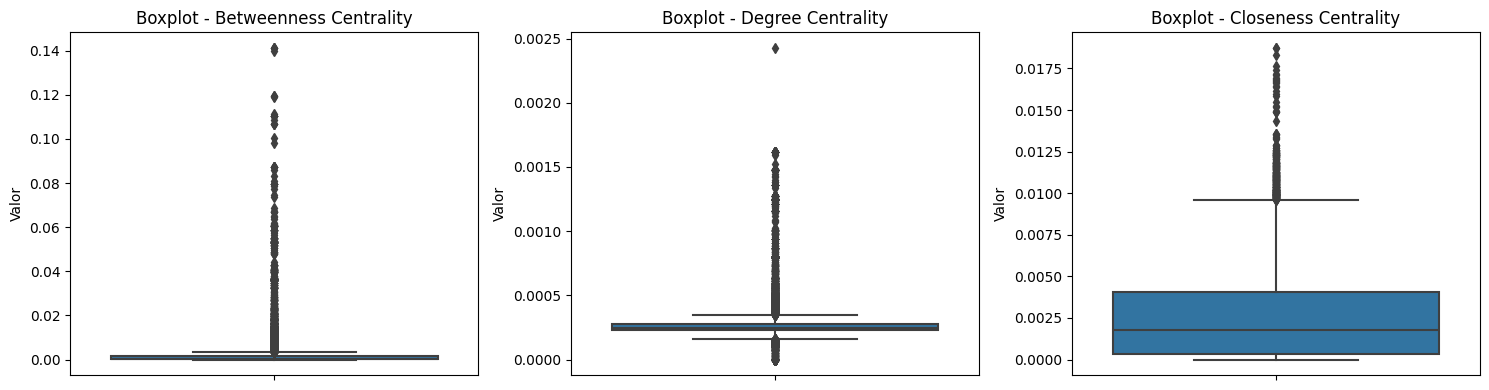

In [15]:
# ========== 1. Distribuições das métricas ==========
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.boxplot(y=df["betweenness_centrality"], ax=axes[0])
axes[0].set_title("Boxplot - Betweenness Centrality")
axes[0].set_ylabel("Valor")

sns.boxplot(y=df["degree_centrality"], ax=axes[1])
axes[1].set_title("Boxplot - Degree Centrality")
axes[1].set_ylabel("Valor")

sns.boxplot(y=df["closeness_centrality"], ax=axes[2])
axes[2].set_title("Boxplot - Closeness Centrality")
axes[2].set_ylabel("Valor")

plt.tight_layout()
plt.show()

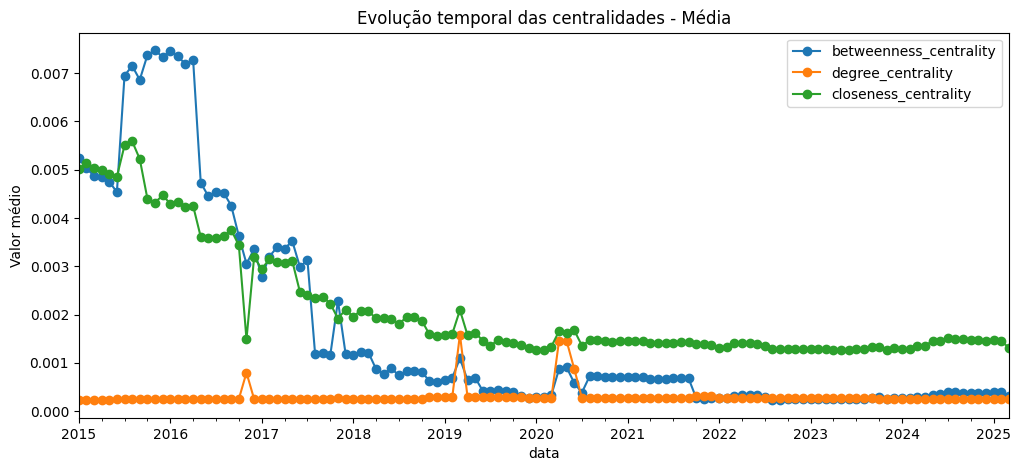

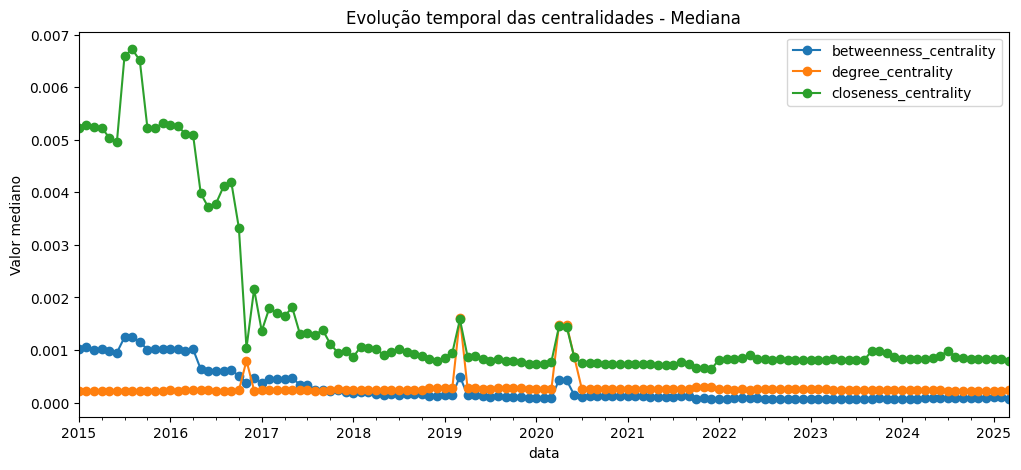

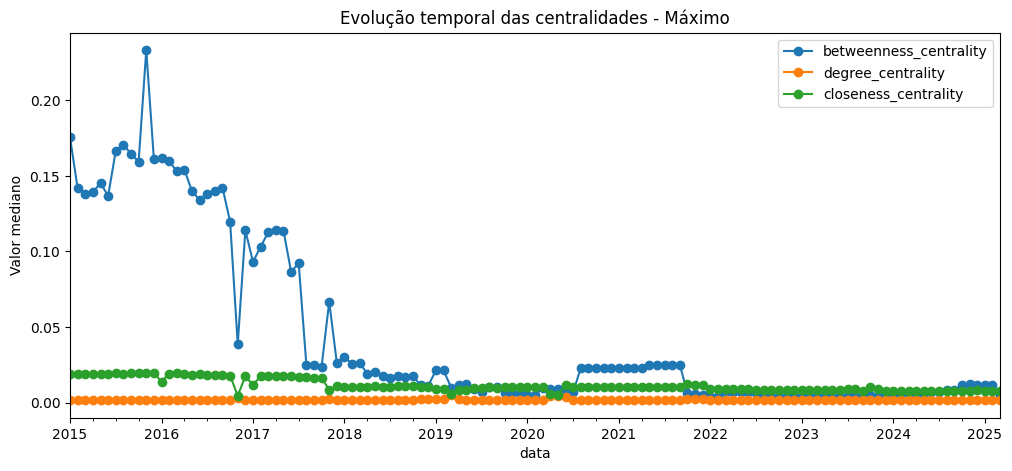

In [15]:
# ========== 2. Evolução temporal ==========
df_grouped = df.groupby(df["data"].dt.to_period("M")).mean(numeric_only=True)
df_grouped.index = df_grouped.index.to_timestamp()

df_grouped[["betweenness_centrality", "degree_centrality", "closeness_centrality"]].plot(
    figsize=(12, 5), marker="o"
)
plt.title("Evolução temporal das centralidades - Média")
plt.ylabel("Valor médio")
plt.show()


df_grouped = df.groupby(df["data"].dt.to_period("M")).median(numeric_only=True)
df_grouped.index = df_grouped.index.to_timestamp()

df_grouped[["betweenness_centrality", "degree_centrality", "closeness_centrality"]].plot(
    figsize=(12, 5), marker="o"
)
plt.title("Evolução temporal das centralidades - Mediana")
plt.ylabel("Valor mediano")
plt.show()

df_grouped = df.groupby(df["data"].dt.to_period("M")).max(numeric_only=True)
df_grouped.index = df_grouped.index.to_timestamp()

df_grouped[["betweenness_centrality", "degree_centrality", "closeness_centrality"]].plot(
    figsize=(12, 5), marker="o"
)
plt.title("Evolução temporal das centralidades - Máximo")
plt.ylabel("Valor mediano")
plt.show()

c:\Users\franc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\franc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\franc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


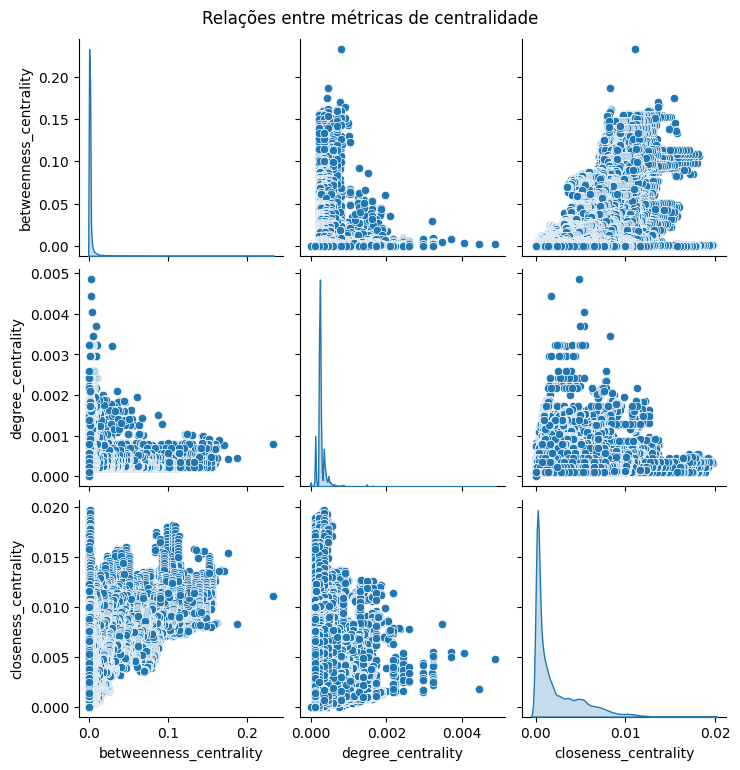

In [ ]:
# ========== Relação entre métricas ==========
sns.pairplot(
    df[["betweenness_centrality", "degree_centrality", "closeness_centrality"]],
    diag_kind="kde"
)
plt.suptitle("Relações entre métricas de centralidade", y=1.02)
plt.show()


In [28]:
df['year'] = df['data'].dt.year


top_df = (
    df.groupby('year', group_keys=False)
      .apply(lambda x: x.nlargest(30, 'betweenness_centrality'))
)

fig = px.bar(
    top_df,
    x="betweenness_centrality",
    y="stop_name",
    color="stop_name",
    orientation="h",
    animation_frame="year",
    range_x=[0, top_df["betweenness_centrality"].max()*1.1],
    title="Top 5 Paradas por Betweenness Centrality ao longo dos anos"
)

fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

C:\Users\franc\AppData\Local\Temp\ipykernel_17772\1093893466.py:6: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [34]:
top_df = (
    df.groupby('year', group_keys=False)
      .apply(lambda x: x.nlargest(50, 'degree_centrality'))
)

fig = px.bar(
    top_df,
    x="degree_centrality",
    y="stop_name",
    color="stop_name",
    orientation="h",
    animation_frame="year",
    range_x=[0, top_df["degree_centrality"].max()*1.1],
    title="Top Paradas por degree_centrality ao longo dos anos"
)

fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

C:\Users\franc\AppData\Local\Temp\ipykernel_17772\1811239981.py:3: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [ ]:
top_df = (
    df.groupby('year', group_keys=False)
      .apply(lambda x: x.nlargest(20, 'closeness_centrality'))
)

fig = px.bar(
    top_df,
    x="closeness_centrality",
    y="stop_name",
    color="stop_name",
    orientation="h",
    animation_frame="year",
    range_x=[0, top_df["closeness_centrality"].max()*1.1],
    title="Top Paradas por closeness_centrality ao longo dos anos"
)

fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()